In [1]:
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Cell 2: Define stock tickers and download historical data
tickers = ["AAPL", "GOOG", "AMZN", "NFLX"]

# Download historical data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start="2014-01-01", end="2024-11-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
data['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.234304,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.855730,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.947643,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.826447,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.932997,258529600


In [7]:
def backtest_strategy(stock_data):
    stock_data['3M_High'] = stock_data['Adj Close'].rolling(window=63).max()  # 3-month high
    stock_data['MA20'] = stock_data['Adj Close'].rolling(window=20).mean()   # 20-day moving average

    # Create buy signal: 3-month high on the second occurrence
    stock_data['Buy_Signal'] = (
        (stock_data['Adj Close'] == stock_data['3M_High']) &
        (stock_data['Adj Close'].shift(1) == stock_data['3M_High'].shift(1))
    ).shift(1)

    # Forward fill buy signals for holding the position
    stock_data['Position'] = stock_data['Buy_Signal'].cumsum()
    stock_data['Sell_Signal'] = stock_data['Adj Close'] < stock_data['MA20']
    stock_data['Position'] = np.where(stock_data['Sell_Signal'], 0, stock_data['Position'])

    # Calculate returns
    stock_data['Strategy_Return'] = stock_data['Adj Close'].pct_change() * stock_data['Position'].shift(1)
    stock_data['Buy_and_Hold_Return'] = stock_data['Adj Close'].pct_change()

    return stock_data

In [8]:
backtest_results = {}
for ticker, stock_data in data.items():
    backtest_results[ticker] = backtest_strategy(stock_data)

In [9]:
strategy_returns = pd.concat([backtest_results[ticker]['Strategy_Return'] for ticker in tickers], axis=1).mean(axis=1)
buy_hold_returns = pd.concat([backtest_results[ticker]['Buy_and_Hold_Return'] for ticker in tickers], axis=1).mean(axis=1)

In [15]:
df = backtest_results['AAPL']
df[df['Buy_Signal'] == True]

,Open,High,Low,Close,Adj Close,Volume,3M_High,MA20,Buy_Signal,Position,Sell_Signal,Strategy_Return,Buy_and_Hold_Return
Date,,,,,,,,,,,,,
2014-04-28,20.457144,21.276787,20.448214,21.217501,18.621325,669485600,18.621325,16.795642,True,1.0,False,0.0,0.038728
2014-04-29,21.205000,21.285000,21.053928,21.154642,18.566153,337377600,18.621325,16.882763,True,2.0,False,-0.002963,-0.002963
2014-05-21,21.565357,21.667856,21.502144,21.653929,19.110493,196859600,19.110493,18.614073,True,3.0,False,0.005292,0.002646
2014-05-22,21.664286,21.780357,21.575001,21.688213,19.140751,200760000,19.140751,18.681294,True,4.0,False,0.00475,0.001583
2014-05-23,21.687500,21.954643,21.659643,21.933214,19.356972,232209600,19.356972,18.752790,True,5.0,False,0.045185,0.011296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.164581,48076100,228.164581,213.756633,True,202.0,False,0.758744,0.003775
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.454895,62627700,232.454895,215.745142,True,203.0,False,3.798326,0.018804
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.057098,64710600,232.454895,216.763841,True,204.0,False,-4.713829,-0.023221


In [38]:
stock_data = data['AAPL'][['Adj Close']].rename(columns = {'Adj Close':'Close'})
stock_data['2022-10-25':]

,Close
Date,
2022-10-25,150.505020
2022-10-26,147.551041
2022-10-27,143.055847
2022-10-28,153.864075
2022-10-31,151.492966
...,...
2024-10-25,231.155685
2024-10-28,233.143494
2024-10-29,233.413193


C:\Users\User\AppData\Local\Temp\ipykernel_9928\2121712734.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Position'].iloc[i] = current_position
C:\Users\User\AppData\Local\Temp\ipykernel_9928\2121712734.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Position'].iloc[i] = current_position
C:\Users\User\AppData\Local\Temp\ipykernel_9928\2121712734.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sto


Performance Metrics:
Total_Return: 35.05%
Annual_Return: 16.07%
Sharpe_Ratio: 127.04%
Max_Drawdown: -8.43%


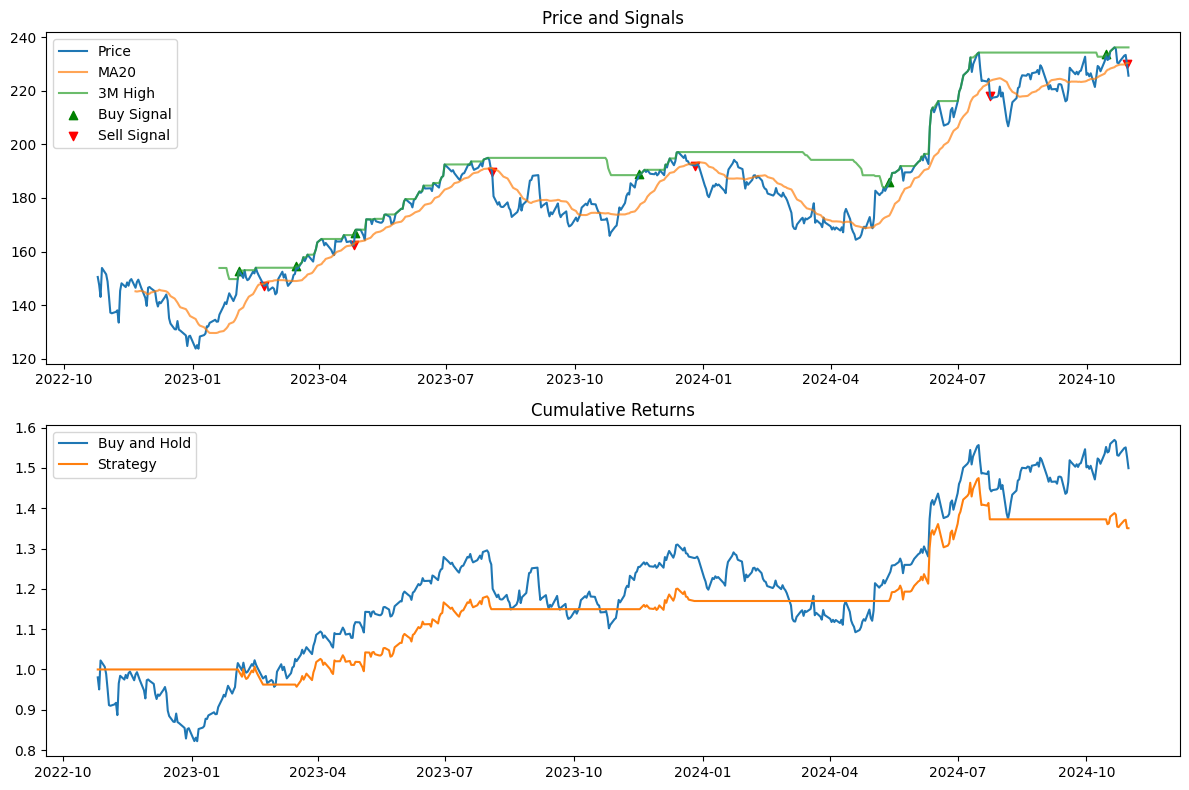

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_sample_data(periods=100, start_date='2023-01-01'):
    """Generate sample price data using sine wave"""
    dates = pd.date_range(start=start_date, periods=periods)
    sine_wave = np.sin(np.linspace(0, 10 * np.pi, periods)) * 10 + 100
    simple_data = pd.DataFrame({'Close': sine_wave}, index=dates)
    return simple_data

def calculate_signals(stock_data, high_window=60, ma_window=20):
    """Calculate trading signals based on 3M High and MA"""
    # Calculate indicators
    stock_data['3M_High'] = stock_data['Close'].rolling(window=high_window).max()
    stock_data['MA20'] = stock_data['Close'].rolling(window=ma_window).mean()
    
    # Generate signals
    stock_data['Buy_Signal'] = stock_data['Close'] > stock_data['3M_High'].shift(1)
    stock_data['Sell_Signal'] = stock_data['Close'] < stock_data['MA20'].shift(1)
    
    return stock_data

def calculate_positions(stock_data):
    """Calculate positions based on buy/sell signals"""
    # Initialize position column
    stock_data['Position'] = 0
    
    # Current position tracker
    current_position = 0
    
    # Iterate through the data to determine positions
    for i in range(1, len(stock_data)):
        if current_position == 0 and stock_data['Buy_Signal'].iloc[i]:
            current_position = 1
        elif current_position == 1 and stock_data['Sell_Signal'].iloc[i]:
            current_position = 0
        
        stock_data['Position'].iloc[i] = current_position
    
    return stock_data

def calculate_returns(stock_data):
    """Calculate strategy returns and performance metrics"""
    # Calculate returns
    stock_data['Market_Return'] = stock_data['Close'].pct_change()
    stock_data['Strategy_Return'] = stock_data['Market_Return'] * stock_data['Position'].shift(1)
    
    # Calculate cumulative returns
    stock_data['Cum_Market_Return'] = (1 + stock_data['Market_Return']).cumprod()
    stock_data['Cum_Strategy_Return'] = (1 + stock_data['Strategy_Return']).cumprod()
    
    # Calculate performance metrics
    performance = {
        'Total_Return': stock_data['Cum_Strategy_Return'].iloc[-1] - 1,
        'Annual_Return': ((stock_data['Cum_Strategy_Return'].iloc[-1]) ** (252/len(stock_data)) - 1),
        'Sharpe_Ratio': stock_data['Strategy_Return'].mean() / stock_data['Strategy_Return'].std() * np.sqrt(252),
        'Max_Drawdown': (stock_data['Cum_Strategy_Return'] / stock_data['Cum_Strategy_Return'].cummax() - 1).min()
    }
    
    return stock_data, performance

def plot_results(stock_data):
    """Plot price data, signals, and cumulative returns"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot price and signals
    ax1.plot(stock_data.index, stock_data['Close'], label='Price')
    ax1.plot(stock_data.index, stock_data['MA20'], label='MA20', alpha=0.7)
    ax1.plot(stock_data.index, stock_data['3M_High'], label='3M High', alpha=0.7)
    
    # Plot buy and sell signals
    buy_signals = stock_data[stock_data['Buy_Signal'] & (stock_data['Position'].shift(1) == 0)]
    sell_signals = stock_data[stock_data['Sell_Signal'] & (stock_data['Position'].shift(1) == 1)]
    
    ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
    ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')
    ax1.set_title('Price and Signals')
    ax1.legend()
    
    # Plot cumulative returns
    ax2.plot(stock_data.index, stock_data['Cum_Market_Return'], label='Buy and Hold')
    ax2.plot(stock_data.index, stock_data['Cum_Strategy_Return'], label='Strategy')
    ax2.set_title('Cumulative Returns')
    ax2.legend()
    
    plt.tight_layout()
    return fig

def run_backtest():
    """Run the complete backtest"""
    # Generate sample data
    # stock_data = generate_sample_data()
    stock_data = data['AAPL']['2022-10-25':][['Adj Close']].rename(columns = {'Adj Close':'Close'})
    # Calculate signals
    stock_data = calculate_signals(stock_data)
    
    # Calculate positions
    stock_data = calculate_positions(stock_data)
    
    # Calculate returns and performance
    stock_data, performance = calculate_returns(stock_data)
    
    # Plot results
    fig = plot_results(stock_data)
    
    return stock_data, performance, fig

# Run the backtest
stock_data, performance, fig = run_backtest()

# Print performance metrics
print("\nPerformance Metrics:")
for metric, value in performance.items():
    print(f"{metric}: {value:.2%}")

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Strategy Performance:
Total_Return: 75.59%
Annual_Return: 76.38%
Sharpe_Ratio: 223.02%
Max_Drawdown: -14.89%

Buy & Hold Performance:
Total_Return: 94.52%
Annual_Return: 95.55%
Sharpe_Ratio: 260.72%
Max_Drawdown: -15.16%


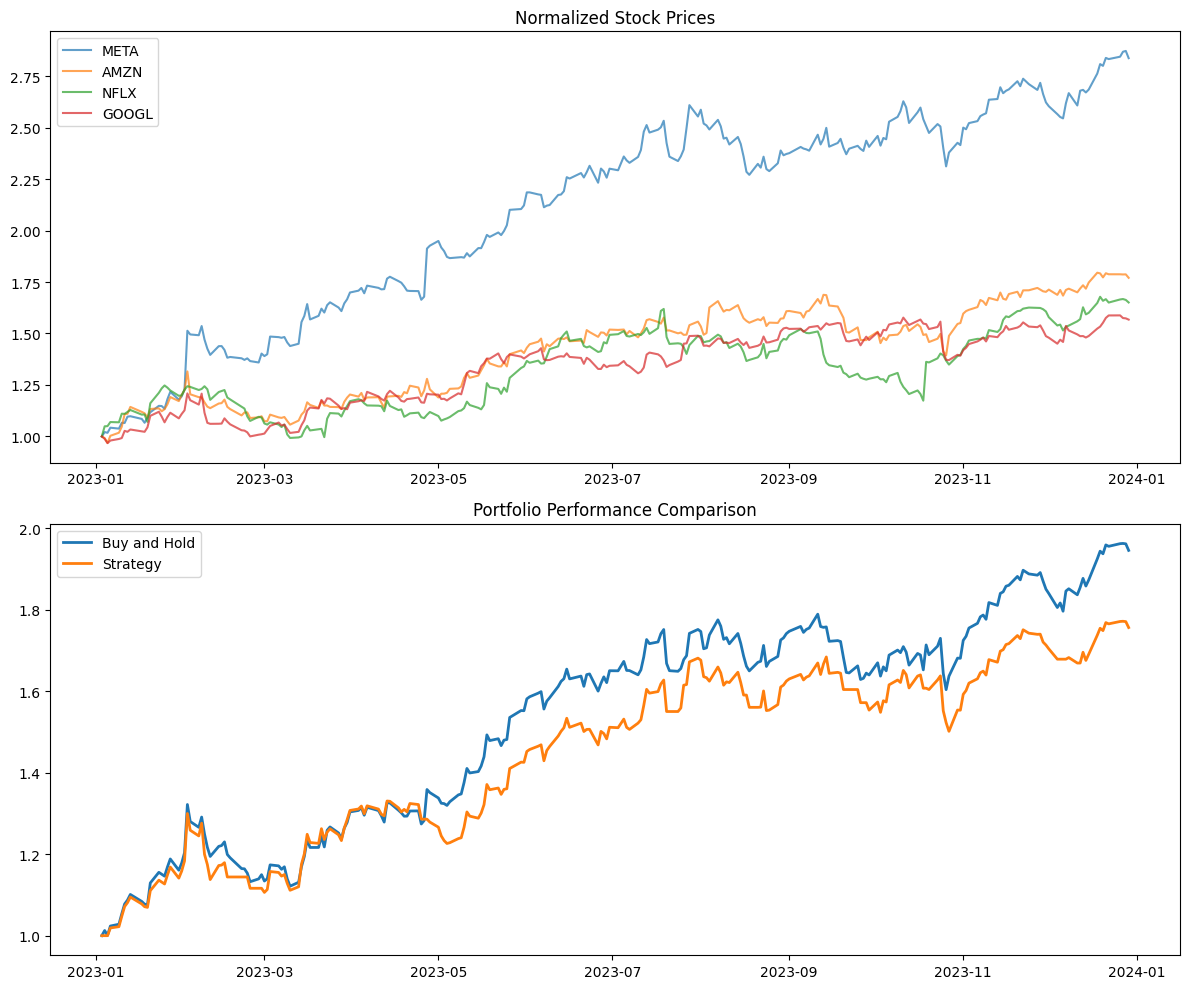

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def download_fang_data(start_date='2023-01-01', end_date='2024-01-01'):
    """Download FANG stocks price data from Yahoo Finance"""
    # Define FANG stock tickers (using META for Facebook)
    tickers = ['META', 'AMZN', 'NFLX', 'GOOGL']
    
    # Download data
    data = {}
    for ticker in tickers:
        stock = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = stock['Adj Close']
    
    # Combine into a single DataFrame
    prices_df = pd.DataFrame(data)
    return prices_df

def calculate_signals(stock_data, high_window=2, ma_window=10):
    """Calculate trading signals for multiple stocks"""
    signals = pd.DataFrame(index=stock_data.index)
    
    for column in stock_data.columns:
        # Calculate indicators for each stock
        high = stock_data[column].rolling(window=high_window).max()
        ma = stock_data[column].rolling(window=ma_window).mean()
        
        # Generate signals
        buy_signal = stock_data[column] > high.shift(1)
        sell_signal = stock_data[column] < ma.shift(1)
        
        signals[f'{column}_Buy_Signal'] = buy_signal
        signals[f'{column}_Sell_Signal'] = sell_signal
    
    return signals

def calculate_positions(stock_data, signals):
    """Calculate positions for multiple stocks"""
    positions = pd.DataFrame(0, index=stock_data.index, columns=stock_data.columns)
    
    for column in stock_data.columns:
        current_position = 0
        
        # Iterate through the data to determine positions
        for i in range(1, len(stock_data)):
            if current_position == 0 and signals[f'{column}_Buy_Signal'].iloc[i]:
                current_position = 1
            elif current_position == 1 and signals[f'{column}_Sell_Signal'].iloc[i]:
                current_position = 0
            
            positions[column].iloc[i] = current_position
    
    return positions

def calculate_portfolio_returns(stock_data, positions):
    """Calculate portfolio-level returns for both strategy and buy-hold"""
    # Calculate individual stock returns
    stock_returns = stock_data.pct_change()
    
    # Calculate equal-weight buy and hold returns
    n_stocks = len(stock_data.columns)
    weight_per_stock = 1 / n_stocks
    portfolio_bh_returns = (stock_returns * weight_per_stock).sum(axis=1)
    
    # Calculate strategy returns for each stock
    strategy_returns = stock_returns * positions.shift(1)
    
    # Calculate equal-weight strategy portfolio returns
    # Only divide by number of active positions to maintain full exposure
    active_positions = positions.shift(1).sum(axis=1)
    active_positions = active_positions.replace(0, 1)  # Avoid division by zero
    portfolio_strategy_returns = strategy_returns.sum(axis=1) / active_positions
    
    # Calculate cumulative returns
    portfolio_bh_cum_returns = (1 + portfolio_bh_returns).cumprod()
    portfolio_strategy_cum_returns = (1 + portfolio_strategy_returns).cumprod()
    
    # Calculate performance metrics
    performance = {
        'Strategy': {
            'Total_Return': portfolio_strategy_cum_returns.iloc[-1] - 1,
            'Annual_Return': ((portfolio_strategy_cum_returns.iloc[-1]) ** (252/len(stock_data)) - 1),
            'Sharpe_Ratio': portfolio_strategy_returns.mean() / portfolio_strategy_returns.std() * np.sqrt(252),
            'Max_Drawdown': (portfolio_strategy_cum_returns / portfolio_strategy_cum_returns.cummax() - 1).min()
        },
        'Buy_Hold': {
            'Total_Return': portfolio_bh_cum_returns.iloc[-1] - 1,
            'Annual_Return': ((portfolio_bh_cum_returns.iloc[-1]) ** (252/len(stock_data)) - 1),
            'Sharpe_Ratio': portfolio_bh_returns.mean() / portfolio_bh_returns.std() * np.sqrt(252),
            'Max_Drawdown': (portfolio_bh_cum_returns / portfolio_bh_cum_returns.cummax() - 1).min()
        }
    }
    
    return {
        'Returns': {
            'Strategy': portfolio_strategy_returns,
            'Buy_Hold': portfolio_bh_returns
        },
        'Cumulative': {
            'Strategy': portfolio_strategy_cum_returns,
            'Buy_Hold': portfolio_bh_cum_returns
        },
        'Performance': performance
    }

def plot_results(stock_data, positions, returns_data):
    """Plot portfolio results"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot normalized prices
    normalized_prices = stock_data / stock_data.iloc[0]
    for column in normalized_prices.columns:
        ax1.plot(normalized_prices.index, normalized_prices[column], label=column, alpha=0.7)
    
    ax1.set_title('Normalized Stock Prices')
    ax1.legend()
    
    # Plot cumulative returns comparison
    ax2.plot(returns_data['Cumulative']['Buy_Hold'].index, 
             returns_data['Cumulative']['Buy_Hold'], 
             label='Buy and Hold', linewidth=2)
    ax2.plot(returns_data['Cumulative']['Strategy'].index, 
             returns_data['Cumulative']['Strategy'], 
             label='Strategy', linewidth=2)
    ax2.set_title('Portfolio Performance Comparison')
    ax2.legend()
    
    plt.tight_layout()
    return fig

def run_portfolio_backtest(start_date='2023-01-01', end_date='2024-01-01'):
    """Run the complete portfolio backtest"""
    # Download FANG stock data
    stock_data = download_fang_data(start_date, end_date)
    
    # Calculate signals
    signals = calculate_signals(stock_data)
    
    # Calculate positions
    positions = calculate_positions(stock_data, signals)
    
    # Calculate portfolio returns and performance
    returns_data = calculate_portfolio_returns(stock_data, positions)
    
    # Plot results
    fig = plot_results(stock_data, positions, returns_data)
    
    return stock_data, positions, returns_data, fig

# Run the backtest
stock_data, positions, returns_data, fig = run_portfolio_backtest()

# Print performance metrics
print("\nStrategy Performance:")
for metric, value in returns_data['Performance']['Strategy'].items():
    print(f"{metric}: {value:.2%}")

print("\nBuy & Hold Performance:")
for metric, value in returns_data['Performance']['Buy_Hold'].items():
    print(f"{metric}: {value:.2%}")

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


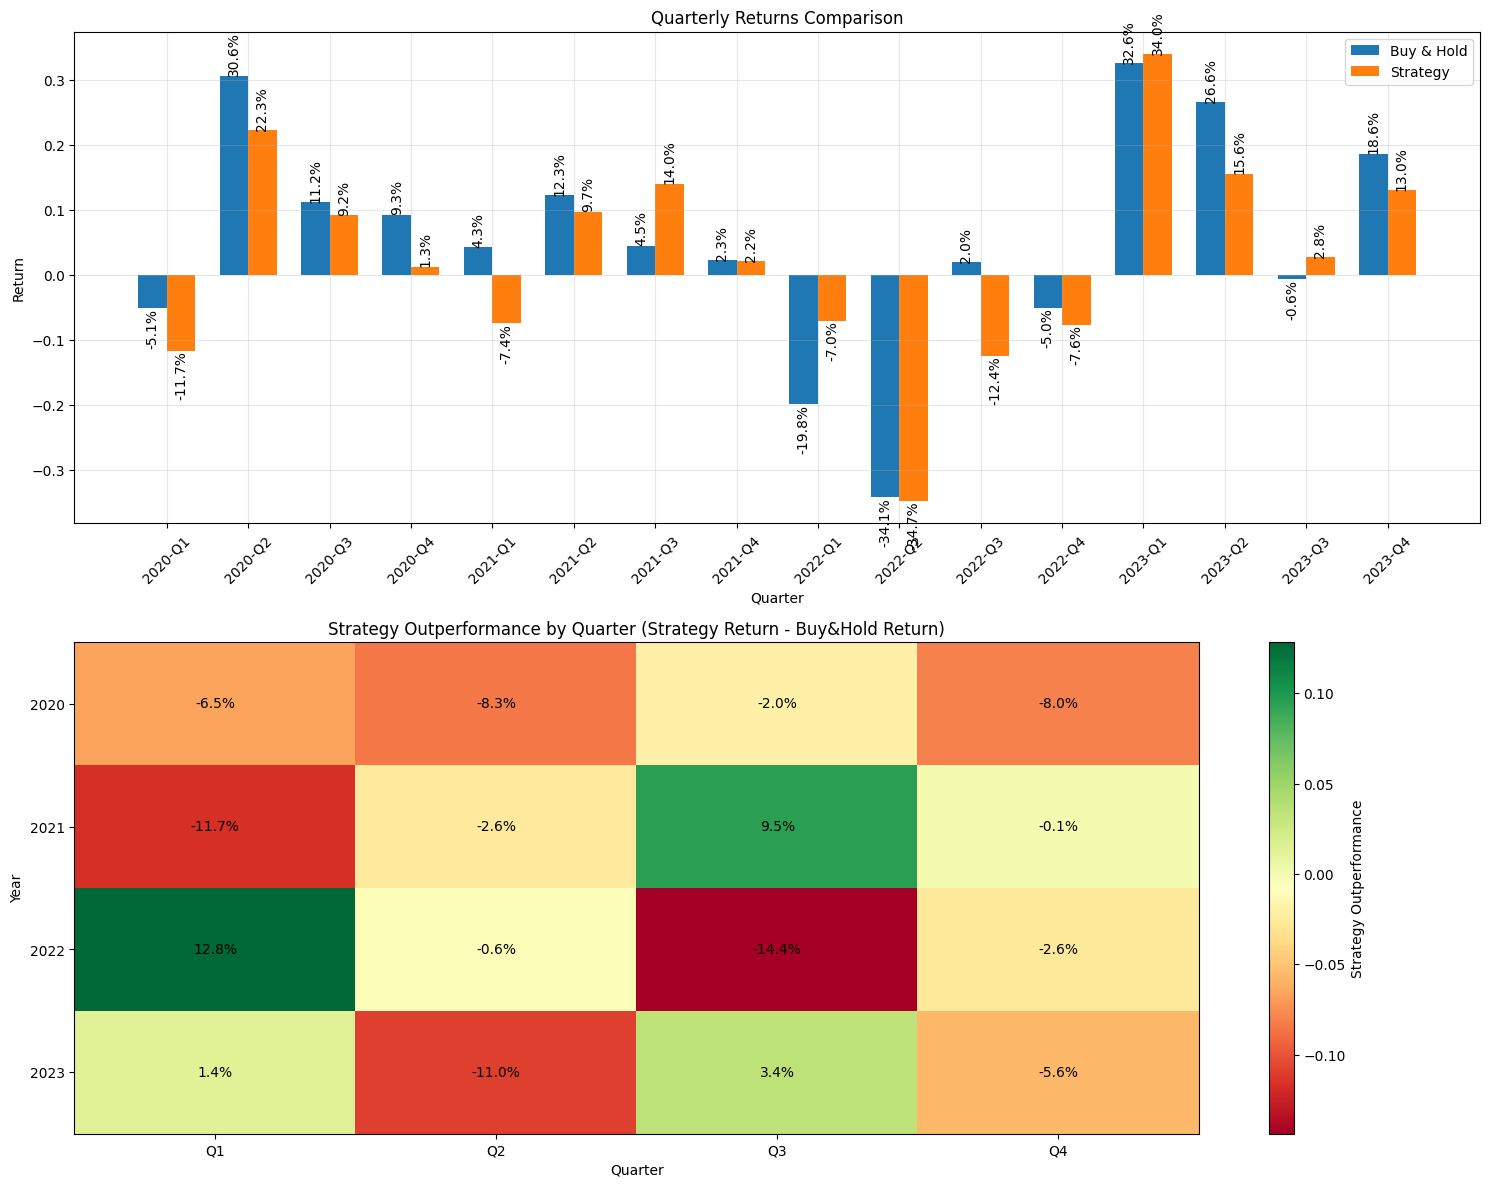

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from itertools import cycle

def download_fang_data(start_date='2020-01-01', end_date='2024-01-01'):
    """Download FANG stocks price data from Yahoo Finance"""
    tickers = ['META', 'AMZN', 'NFLX', 'GOOGL']
    data = {}
    for ticker in tickers:
        stock = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = stock['Adj Close']
    return pd.DataFrame(data)

def calculate_signals(stock_data, high_window=2, ma_window=10):
    """Calculate trading signals for multiple stocks"""
    signals = pd.DataFrame(index=stock_data.index)
    for column in stock_data.columns:
        high = stock_data[column].rolling(window=high_window).max()
        ma = stock_data[column].rolling(window=ma_window).mean()
        signals[f'{column}_Buy_Signal'] = stock_data[column] > high.shift(1)
        signals[f'{column}_Sell_Signal'] = stock_data[column] < ma.shift(1)
    return signals

def calculate_positions(stock_data, signals):
    """Calculate positions for multiple stocks"""
    positions = pd.DataFrame(0, index=stock_data.index, columns=stock_data.columns)
    for column in stock_data.columns:
        current_position = 0
        for i in range(1, len(stock_data)):
            if current_position == 0 and signals[f'{column}_Buy_Signal'].iloc[i]:
                current_position = 1
            elif current_position == 1 and signals[f'{column}_Sell_Signal'].iloc[i]:
                current_position = 0
            positions[column].iloc[i] = current_position
    return positions

def calculate_portfolio_returns(stock_data, positions):
    """Calculate portfolio-level returns for both strategy and buy-hold"""
    stock_returns = stock_data.pct_change()
    n_stocks = len(stock_data.columns)
    weight_per_stock = 1 / n_stocks
    
    # Buy and hold returns
    portfolio_bh_returns = (stock_returns * weight_per_stock).sum(axis=1)
    
    # Strategy returns
    strategy_returns = stock_returns * positions.shift(1)
    active_positions = positions.shift(1).sum(axis=1)
    active_positions = active_positions.replace(0, 1)  # Avoid division by zero
    portfolio_strategy_returns = strategy_returns.sum(axis=1) / active_positions
    
    return {
        'Returns': {
            'Strategy': portfolio_strategy_returns,
            'Buy_Hold': portfolio_bh_returns
        }
    }

def calculate_quarterly_returns(returns_data):
    """Calculate quarterly returns for both strategies"""
    quarterly_returns = pd.DataFrame()
    
    for strategy in ['Strategy', 'Buy_Hold']:
        daily_returns = returns_data['Returns'][strategy]
        quarterly = (1 + daily_returns).resample('Q').prod() - 1
        quarterly.index = pd.MultiIndex.from_arrays([
            quarterly.index.year,
            quarterly.index.quarter
        ], names=['Year', 'Quarter'])
        quarterly_returns[strategy] = quarterly
    
    return quarterly_returns

def plot_quarterly_comparison(quarterly_returns):
    """Create plots comparing quarterly returns with two bars per quarter"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Create x-axis labels
    x_labels = [f'{year}-Q{quarter}' for year, quarter in quarterly_returns.index]
    x = np.arange(len(x_labels))  # the label locations
    width = 0.35  # the width of the bars
    
    # Get returns
    strategy_returns = quarterly_returns['Strategy'].values
    buy_hold_returns = quarterly_returns['Buy_Hold'].values
    
    # Plot bars
    ax1.bar(x - width/2, buy_hold_returns, width, label='Buy & Hold')
    ax1.bar(x + width/2, strategy_returns, width, label='Strategy')
    
    # Formatting
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Return')
    ax1.set_title('Quarterly Returns Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add return values on bars
    for i in range(len(x)):
        bh_return = buy_hold_returns[i]
        strategy_return = strategy_returns[i]
        ax1.text(x[i] - width/2, bh_return, 
                f'{bh_return:.1%}', 
                ha='center', va='bottom' if bh_return > 0 else 'top',
                rotation=90)
        ax1.text(x[i] + width/2, strategy_return,
                f'{strategy_return:.1%}',
                ha='center', va='bottom' if strategy_return > 0 else 'top',
                rotation=90)
    
    # Return difference heatmap
    return_diff = quarterly_returns['Strategy'] - quarterly_returns['Buy_Hold']
    # Since the index is (Year, Quarter), we can unstack to create a matrix
    return_diff_matrix = return_diff.unstack(level='Quarter')
    
    # Create heatmap manually
    im = ax2.imshow(return_diff_matrix, cmap='RdYlGn', aspect='auto')
    plt.colorbar(im, ax=ax2, label='Strategy Outperformance')
    
    # Add text annotations to heatmap
    years = return_diff_matrix.index.values
    quarters = return_diff_matrix.columns.values
    for i in range(len(years)):
        for j in range(len(quarters)):
            value = return_diff_matrix.iloc[i, j]
            if not np.isnan(value):
                ax2.text(j, i, f'{value:.1%}',
                        ha='center', va='center',
                        color='black' if abs(value) < 0.2 else 'white')
    
    ax2.set_title('Strategy Outperformance by Quarter (Strategy Return - Buy&Hold Return)')
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Year')
    ax2.set_xticks(range(len(quarters)))
    ax2.set_xticklabels([f'Q{q}' for q in quarters])
    ax2.set_yticks(range(len(years)))
    ax2.set_yticklabels(years)
    
    plt.tight_layout()
    return fig

def run_portfolio_backtest(start_date='2020-01-01', end_date='2024-01-01'):
    """Run the complete portfolio backtest with quarterly analysis"""
    stock_data = download_fang_data(start_date, end_date)
    signals = calculate_signals(stock_data)
    positions = calculate_positions(stock_data, signals)
    returns_data = calculate_portfolio_returns(stock_data, positions)
    quarterly_returns = calculate_quarterly_returns(returns_data)
    fig = plot_quarterly_comparison(quarterly_returns)
    return quarterly_returns, returns_data, fig


quarterly_returns, returns_data, fig = run_portfolio_backtest()
plt.show()

In [41]:
df = download_fang_data(start_date='2023-01-01', end_date='2024-01-01')
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,META,AMZN,NFLX,GOOGL
Date,,,,
2023-01-03,124.365540,85.820000,294.950012,88.899872
2023-01-04,126.987656,85.139999,309.410004,87.862442
2023-01-05,126.558945,83.120003,309.700012,85.987076
2023-01-06,129.629700,86.080002,315.549988,87.124260
2023-01-09,129.081345,87.360001,315.170013,87.802582
...,...,...,...,...
2023-12-22,352.329163,153.419998,486.760010,141.140518
2023-12-26,353.764832,153.410004,491.190002,141.170441
2023-12-27,356.755829,153.339996,491.790009,140.023270


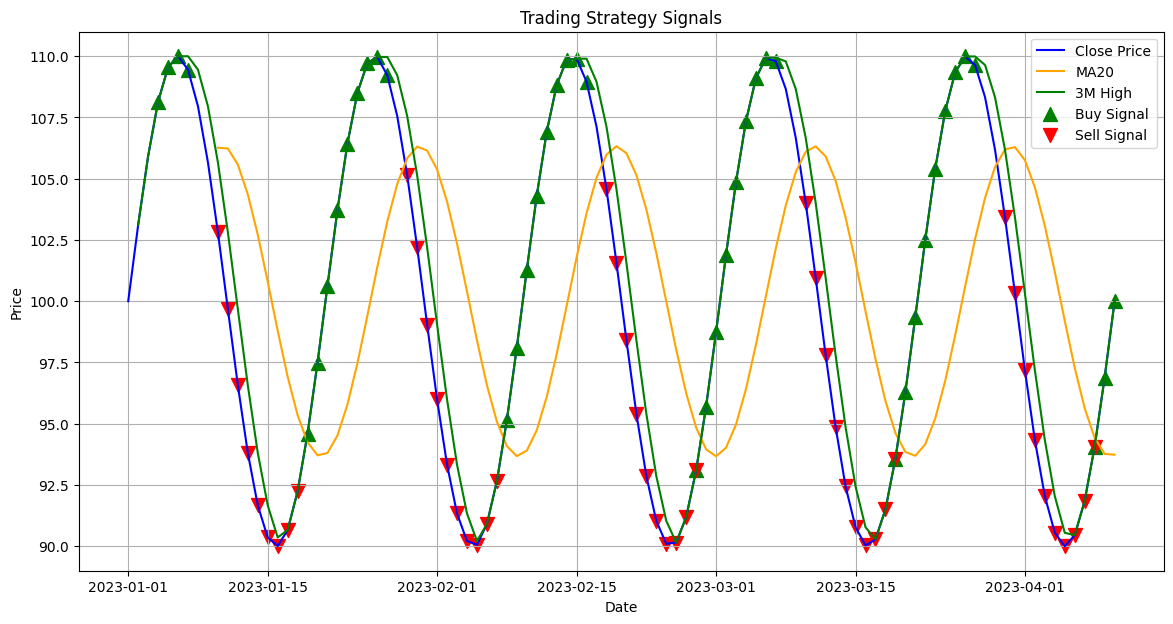

In [ ]:
import matplotlib.pyplot as plt

# Plot Close Price, MA20, and 3M_High
plt.figure(figsize=(14,7))

plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['MA20'], label='MA20', color='orange')
plt.plot(stock_data.index, stock_data['3M_High'], label='3M High', color='green')

# Plot buy signals
buy_signals = stock_data[stock_data['Buy_Signal'] == True]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=100)

# Plot sell signals
sell_signals = stock_data[stock_data['Sell_Signal'] == True]
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)

plt.title('Trading Strategy Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()